### Описание проекта

У нас есть  данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [2]:
import pandas as pd
data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропуски в столбцах Critic_Score, User_Score, Rating, Year_of_Release. Типы данных значений в столбцах Year_of_Release, Critic_Score можно преобразить в целочисленный, User_Score в вещественный.

Приведем столбцы к нижнему регистру.

In [4]:
data.columns = data.columns.str.lower()

Аббревиатура 'tbd' скорее всего расшифровывается, как to be determined, заменим его на значение nan. Остальные пропуски оставим, как есть. Пропуски в столбцах с рейтингом трудно заменить чем нибудь логичным и замена может привести к искажению данных.

In [5]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

---
## Комментарий от наставника

Верно, по своей сути tbd и является Nan. 

---

Преобразуем данные в нужные типы. А именно столбец year_of_release и critic_score к целочисленному типу. 

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = data['user_score'].astype('float')

Пропуски в столбцах с рейтингом полностью случайные. Т.е. они никак не зависят от значений в других столбцах. И заменять их не стоит т.к. пропусков больше половины от общего количество и заменив их мы однозначно исказим данные. 

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [7]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим сколько игр выпускалось в разные годы.

In [8]:
data.groupby('year_of_release').agg({'name': ['unique']})['name']['unique'].apply(len)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      60
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: unique, dtype: int64

Данные за все периоды важны.

Выберем платформы с наибольшими суммарными продажами.

In [9]:
top_platform = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).head(10)

Построим распределение по годам.

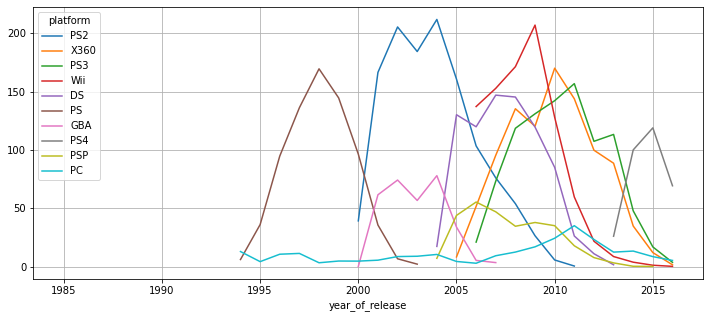

In [10]:
data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(y=top_platform.index, grid=True, figsize=(12, 5))

За 8-10 лет появляются новые и исчезают старый платформы. 

Возьмем за актуальный период последние 10 лет т.е. данные с 2010 года. 

In [11]:
data = data.query('year_of_release >= 2010')

ValueError: unknown type object

Определим какие платформы лидируют по продажам. 

In [12]:
lider = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).head(10)
lider

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


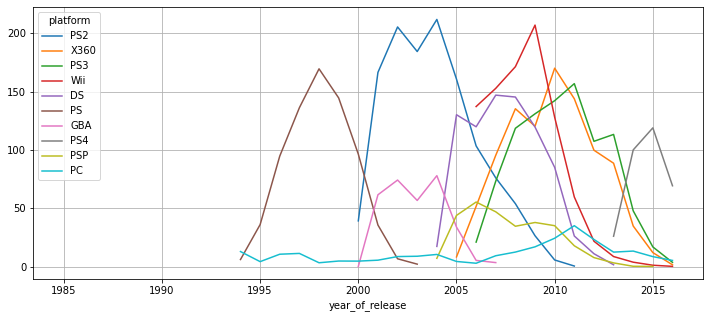

In [13]:
data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(y=lider.index, grid=True, figsize=(12, 5))

Все наши лидеры по продажам на 2016 год падают.

Выберем несколько платформ. Это будут: PS4, XOne, 3DS. Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

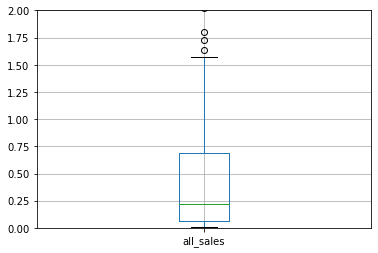

In [14]:
import matplotlib.pyplot as plt
plt.ylim(0, 2)
XOne = data.loc[data['platform'] == 'XOne']
XOne.boxplot('all_sales')

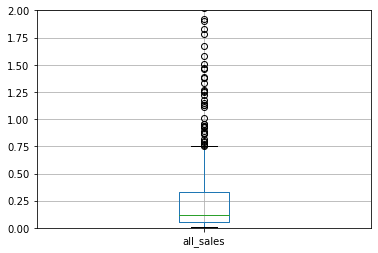

In [15]:
plt.ylim(0, 2)
DS = data.loc[data['platform'] == '3DS']
DS.boxplot('all_sales')

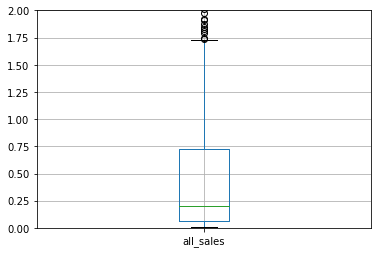

In [16]:
plt.ylim(0, 2)
PS4 = data.loc[data['platform'] == 'PS4']
PS4.boxplot('all_sales')

По продажам за последние 10 лет отстает 3DS.

In [17]:
XOne['all_sales'].mean()

0.6450202429149797

In [18]:
PS4['all_sales'].mean()

0.8013775510204058

In [19]:
DS['all_sales'].mean()

0.4980769230769205

В средних продажах картина аналогичная.

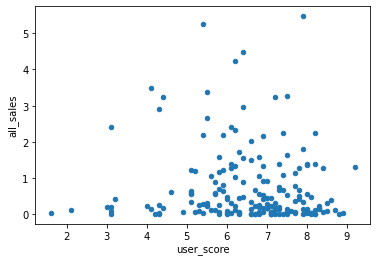

In [21]:
XOne.plot(x='user_score', y='all_sales', kind='scatter')

TypeError: float() argument must be a string or a number, not 'NAType'

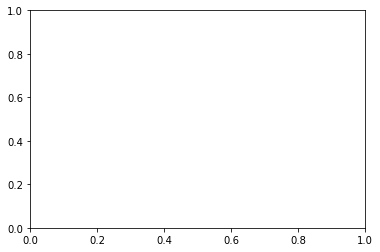

In [22]:
XOne.plot(x='critic_score', y='all_sales', kind='scatter')

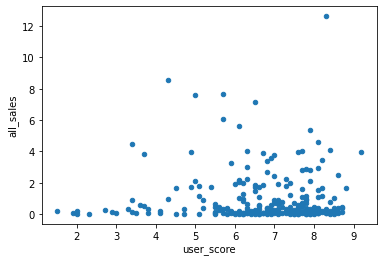

In [24]:
PS4.plot(x='user_score', y='all_sales', kind='scatter')

TypeError: float() argument must be a string or a number, not 'NAType'

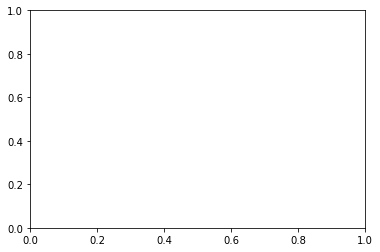

In [25]:
PS4.plot(x='critic_score', y='all_sales', kind='scatter')

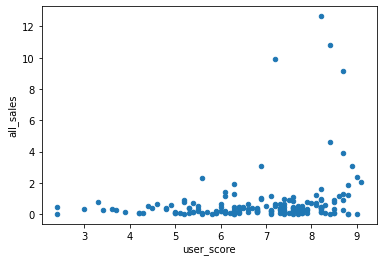

In [27]:
DS.plot(x='user_score', y='all_sales', kind='scatter')

На всех рассмотренных плотформах оценка пользователей вообще не коррелирует с продажами, а оценка критиков незначительно. Из диаграмм видно, что игр с оценками выше средних больше. Т.е. чем выше оценка тем больше игр.

Посмотриv на общее распределение игр по жанрам. 

In [29]:
data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)

,name
genre,
Action,3369
Sports,2348
Misc,1750
Role-Playing,1498
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,873


Посмотрим на самые прибыльные.

In [30]:
data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)

,all_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


На первом месте по количеству игр и продажам жанр Action. Жанры с высокими продажами: Platform, Shooter. С низкими продажами: Misc, Adventure.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). 

In [31]:
data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


In [32]:
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


In [33]:
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


Самые популярные жанры (топ-5). 

In [34]:
data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


In [35]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


In [36]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


Влияет ли рейтинг ESRB на продажи в отдельном регионе?

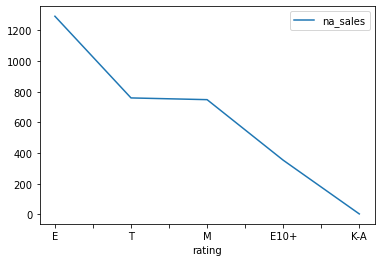

In [37]:
data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).plot()

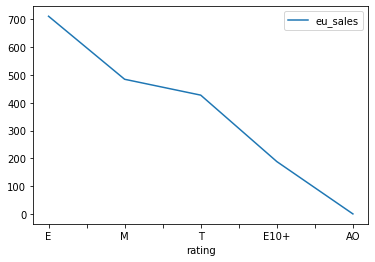

In [38]:
data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).plot()

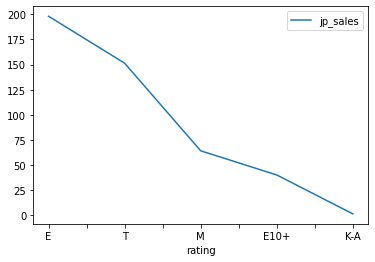

In [39]:
data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).plot()

Тот 3 возрастного рейтинга везде одинаковый.

Проведем статистический тест. Нулевая гепотеза - средние пользовательских платформ Xbox One и PC одинаковые. Альтернативной гепотезой то, что разные.

In [40]:
from scipy import stats as st
results = st.ttest_ind(data.loc[(data['platform'] == 'XOne') & (data['user_score'].isna() == False)]['user_score'], data.loc[(data['platform'] == 'PC') & (data['user_score'].isna() == False)]['user_score'])
alpha = .05
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Нулевая гепотеза - средние рейтинги жанров Action и Sports одинаковые. Альтернативной гепотезой то, что разные.

In [41]:
from scipy import stats as st
results = st.ttest_ind(data.loc[(data['genre'] == 'Action') & (data['user_score'].isna() == False)]['user_score'], data.loc[(data['genre'] == 'Sports') & (data['user_score'].isna() == False)]['user_score'])
alpha = .05
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


### Вывод

Большое количество пропусков в столбцах с рейтнигами полностью случайные, заменив их мы просто растворили бы наши данные. Поэтому решено было работать с тем, что есть. 
Жизнь большинства платформ состовляет около 10 лет. Поэтому решено было за актуальный период взять последние 10 лет. Потенциально прибильными платформами оказались - PS4, XOne, 3DS. Разница в продажах на этих платформах не значительна. 
Отзывы пользователей и критиков не значильно влияют на продажи. И можно сделать вывод, что игр с высокими оценками намного больше. Наверное потому, что игры с низкими оценками быстро заканчивают свое существование.
На первом месте по количеству игр и продажам оказался жанр Action. Жанры с высокими продажами: Platform, Shooter. С низкими продажами: Misc, Adventure.
Статистический тест показал нам, что средние пользовательских платформ Xbox One и PC одинаковые. А средние рейтинги жанров Action и Sports разыне.